### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import skew, kurtosis

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Reading the file

In [3]:
df = pd.read_csv('winequality-red.csv')

### Displaying the first five rows of the dataset to get an idea of how the dataset looks like

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Describing the data

In [5]:
df.describe(include = 'all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Checking type of data and missing values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Checking the number of rows and columns in the dataset

In [7]:
df.shape

(1599, 12)

- The dataset has 1599 rows and 12 columns

### Visualizing the dataset for Null values

In [8]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

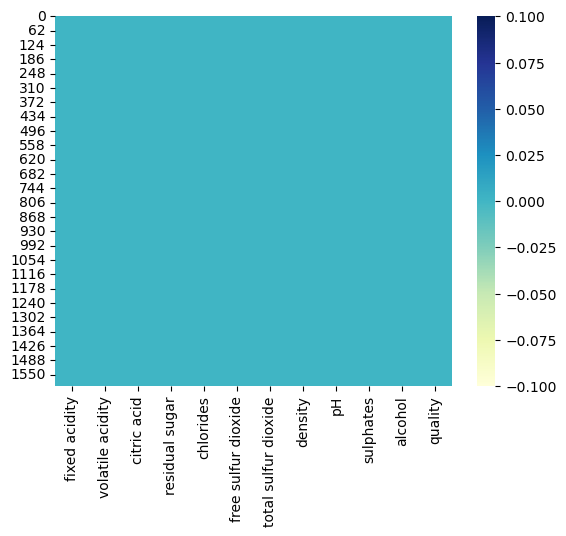

In [9]:
sns.heatmap(df.isnull(), cmap = "YlGnBu");

- Our dataset is completely clean and doesn't contain any Null Values

### Exploratory Data Analysis

##### Checking for duplicates and removing them

In [10]:
# checking if there are duplicated rows using the df.duplicated() function

df[df.duplicated(keep = 'first')]       # keep = 'first' does not mark the first occurrence as duplicate

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [11]:
# get the original shape of the dataframe
original_shape = df.shape

# drop the duplicated rows
df.drop_duplicates(keep = "first", inplace = True)

# get the new shape of the dataframe
new_shape = df.shape

print(f"Shape of dataframe before dropping duplicates: {original_shape}")
print(f"Shape of dataframe after dropping duplicates: {new_shape}")
print(f"Total rows dropped: {original_shape[0] - new_shape[0]}")

Shape of dataframe before dropping duplicates: (1599, 12)
Shape of dataframe after dropping duplicates: (1359, 12)
Total rows dropped: 240


##### Relationship/Correlation of columns with each other

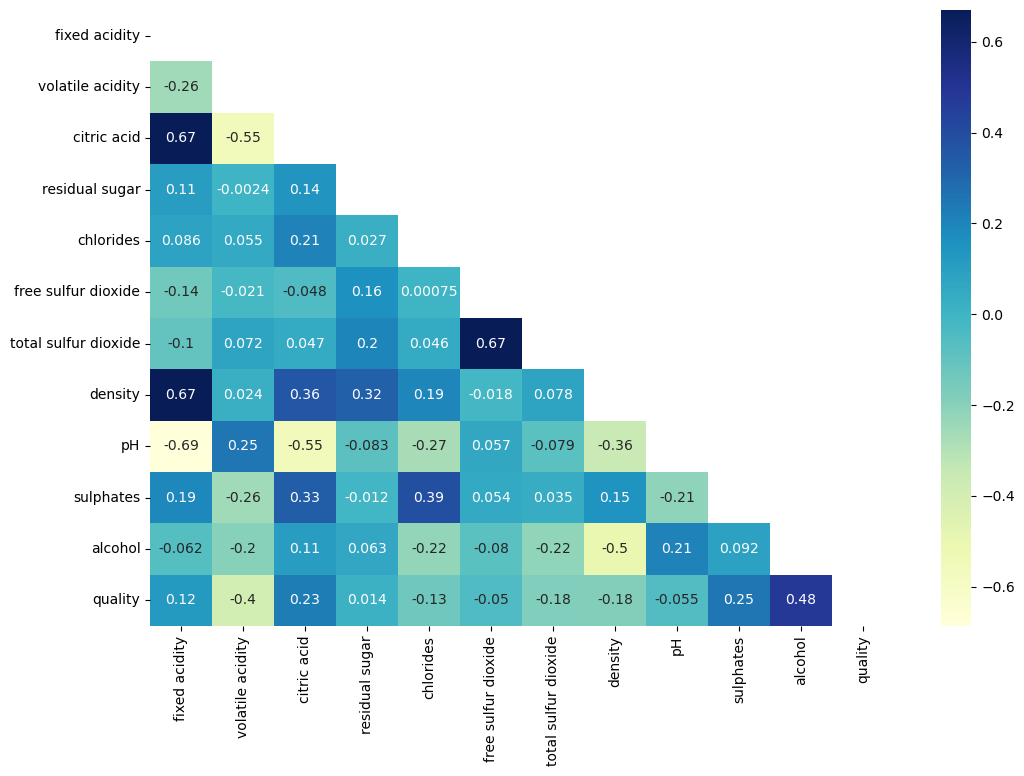

In [12]:
# find the correlation matrix using corr()
numeric_columns = df.select_dtypes(include=['float', 'int']).columns

# Step 2: Calculate the correlation matrix using only the numeric columns
corr = df[numeric_columns].corr()

# get the lower portion of the matrix to avoid redundancy
matrix = np.triu(corr)

# build the heatmap
plt.figure(figsize = (12, 8))
sns.heatmap(corr, annot = True, cmap = "YlGnBu", mask = matrix)

# Save the plot with specific DPI (dots per inch)
plt.savefig('1.png', dpi=300)
plt.show();

The **correlation coefficient** is a number between -1 and 1 that indicates how strong and in what direction the relationship is between two variables.

- A correlation coefficient of 1 indicates a perfect positive correlation meaning that as the value of one variable increases, the value of the other variable also increases.
- A correlation coefficient of -1 indicates a perfect negative correlation, meaning that as the value of one variable increases, the value of the other variable decreases.
- A correlation coefficient of 0 indicates no correlation between the two variables.

Here:
- There is a strong negative correlation (-0.69) between fixed acidity and pH. This means that wines with higher fixed acidity tend to have lower pH.
- There is a moderate positive correlation (0.48) between quality and alcohol. This means that there is a moderate tendency for wines with higher alcohol content to be rated as higher quality.
- There is a strong positive correlation (0.67) between fixed acidity and density. This means that wines with higher fixed acidity tend to have higher density.

*It is important to note that correlation does not imply causation. Just because two variables are correlated does not mean that one variable causes the other.*

##### Heatmaps Showing Mean Values of Each Quality Grade of Wine

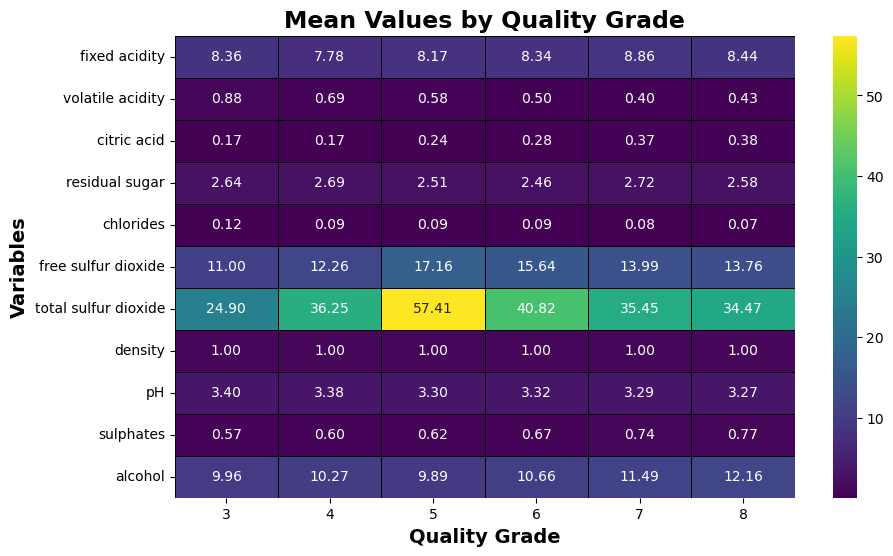

In [13]:
# Calculate the mean values for each quality grade across different variables
mean_quality_grades = df.groupby('quality').mean()

# Plotting the Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(mean_quality_grades.T, annot=True, cmap='viridis', fmt='.2f', linewidths=0.4, linecolor='black')
plt.title('Mean Values by Quality Grade', fontsize = 17, fontweight = 'bold')
plt.xlabel('Quality Grade', fontsize = 14, fontweight = 'bold')
plt.ylabel('Variables', fontsize = 14, fontweight = 'bold')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.savefig('2.png', dpi=300)
plt.show()

##### Skewness and Kurtosis

**Skewness** is described as the asymmetry measure of the data distribution, whereas **Kurtosis** is described as tailedness or peakedness measure of the data distribution. The following code determines the skewness and kurtosis values of all the columns present in the dataset:

In [14]:
numeric_columns = df.select_dtypes(include=['float', 'int']).columns

# Calculate skewness and kurtosis for each numeric column
skewness_values = df[numeric_columns].apply(lambda x: skew(x))
kurtosis_values = df[numeric_columns].apply(lambda x: kurtosis(x))

# Create a DataFrame to display skewness and kurtosis values
stats_df = pd.DataFrame({'Skewness': skewness_values, 'Kurtosis': kurtosis_values})

# Display the statistics DataFrame
print("Skewness and Kurtosis for each numeric column:")
print(stats_df)

Skewness and Kurtosis for each numeric column:
                      Skewness   Kurtosis
fixed acidity         0.940002   1.041404
volatile acidity      0.728474   1.240240
citric acid           0.312380  -0.790433
residual sugar        4.543132  29.252254
chlorides             5.496412  38.478281
free sulfur dioxide   1.225225   1.881323
total sulfur dioxide  1.538667   4.022988
density               0.044728   0.823194
pH                    0.231776   0.872144
sulphates             2.403848  11.057065
alcohol               0.858892   0.154740
quality               0.192194   0.334594


**For Skewness:**
- Skewness approximately equal to 0, the distribution is symmetric.
- Skewness is greater than 0, the distribution is right skewed.
- Skewness is lesser than 0, the distribution is left skewed.

**For Kurtosis:**
- Kurtosis approximately equal to 3 indicates a normal distribution (mesokurtic).
- Kurtosis is greater than 3 indicates heavier tails and a sharper peak (leptokurtic).
- Kurtosis is lesser than 3 indicates lighter tails and a flatter peak (platykurtic).

Being mindful of the above points, we can conclude that:
- 'density' is almost symmetric.
- 'fixed acidity', 'volatile acidity', 'citric acid', 'pH', 'sulphates', 'alcohol', 'quality' are weak right skewed.
- 'free sulfur dioxide', 'total sulfur dioxide' are moderate right skewed.
- 'residual sugar','chlorides', 'sulphates' are strong right skewed.
- 'fixed acidity', 'volatile acidity', 'citric acid', 'free sulfur dioxide', 'density', 'pH', 'alcohol', 'quality' are platykurtic.
- 'residual sugar','chlorides', 'sulphates', 'total sulfur dioxide' are leptokurtic.

##### Distribution/Bar Plots (Visualizing Skewness and Kurtosis)

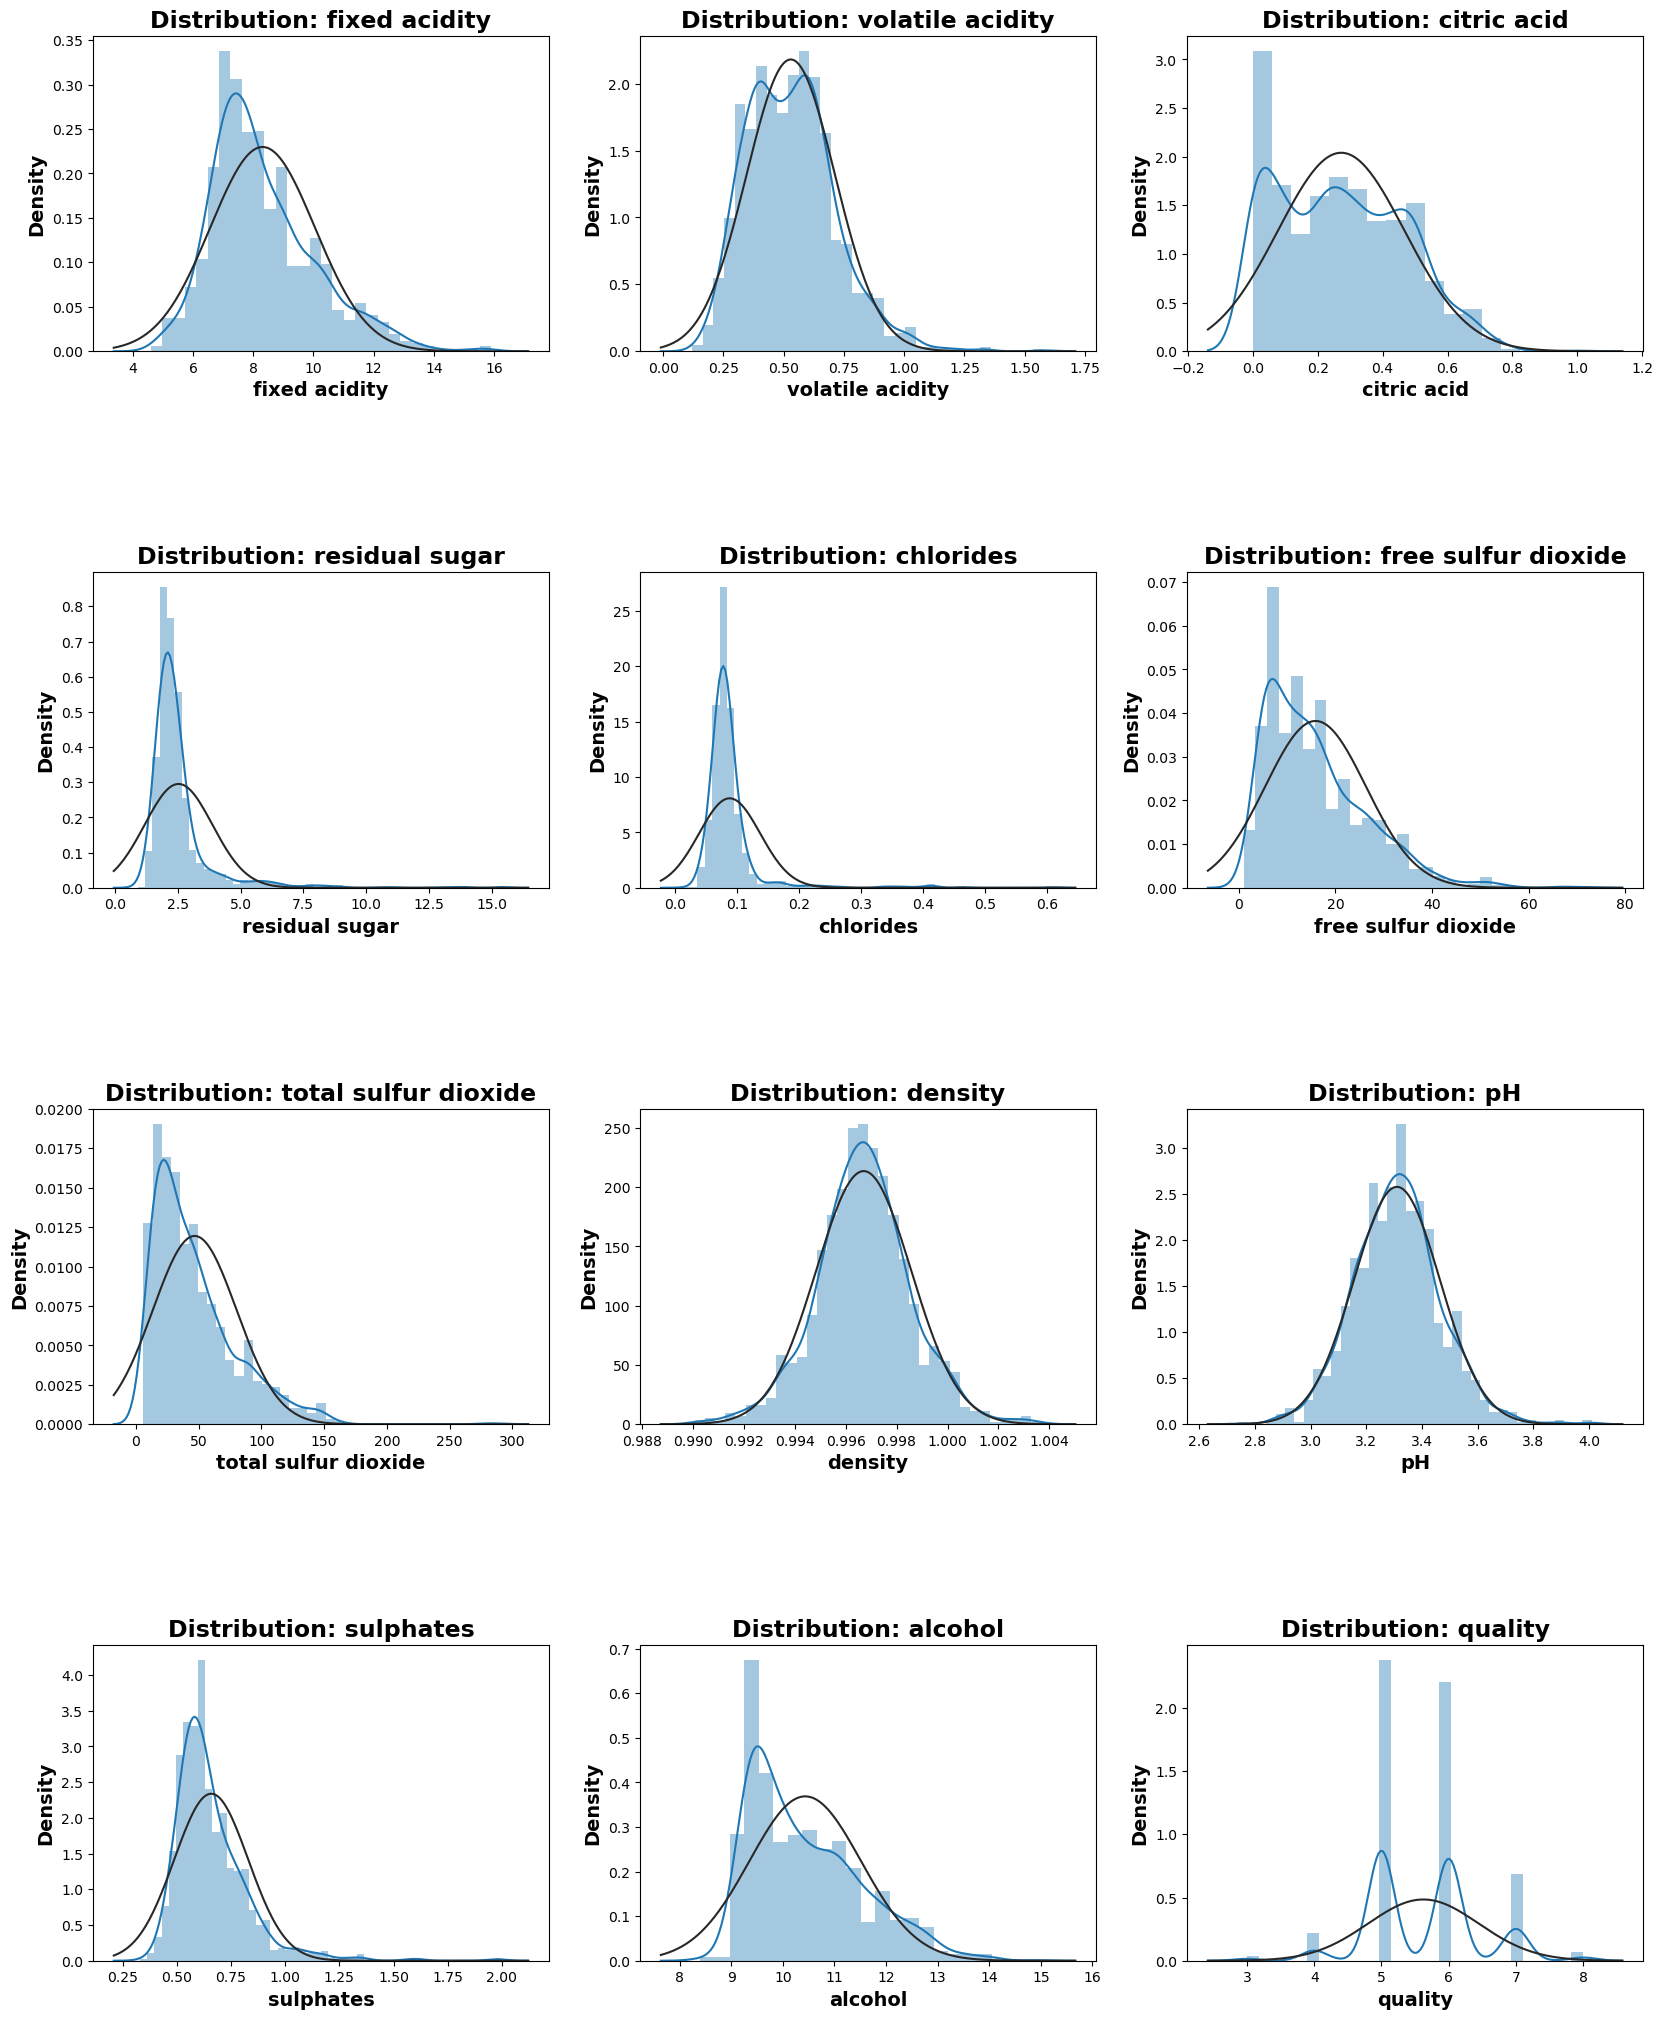

In [16]:
# Visualizing the distribution of features in the dataset using distplot

features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']

fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(20, 25))
plt.subplots_adjust(wspace=0.2, hspace=0.7)

for i in range(len(features)):
    sns.distplot(df[features[i]], fit=norm, ax=ax[i//3, i%3])  # Accessing subplot axis
    title = 'Distribution: ' + features[i]
    ax[i//3, i%3].set_title(title, fontsize=17, fontweight='bold')  # Set title directly on axis
    ax[i//3, i%3].xaxis.label.set_fontsize(14)  # Change fontsize as needed
    ax[i//3, i%3].yaxis.label.set_fontsize(14)  # Change fontsize as needed
    ax[i//3, i%3].xaxis.label.set_fontweight('bold')
    ax[i//3, i%3].yaxis.label.set_fontweight('bold')

plt.savefig('3.png', dpi=300)
plt.show()

##### Scatterplots

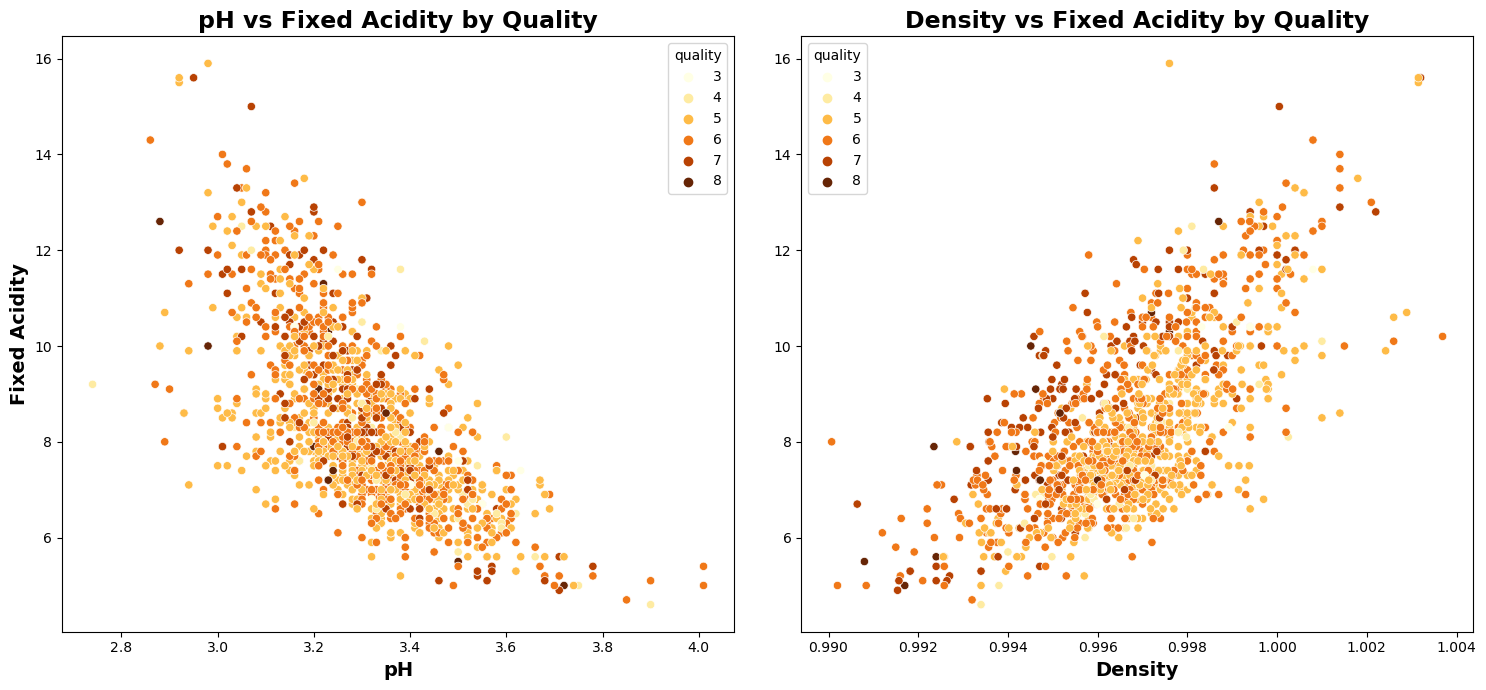

In [17]:
# Set up the subplot layout (1 row, 2 columns)
plt.figure(figsize=(15, 7))

# First subplot (1, 2, 1)
plt.subplot(1, 2, 1)
plt.title("pH vs Fixed Acidity by Quality",fontsize=17, fontweight='bold')
plt.ylabel('Fixed Acidity', fontsize=14, fontweight='bold')
plt.xlabel('pH', fontsize=14, fontweight='bold')
sns.scatterplot(data=df, x="pH", y="fixed acidity", hue="quality", palette="YlOrBr")

# Second subplot (1, 2, 2)
plt.subplot(1, 2, 2)
plt.title("Density vs Fixed Acidity by Quality", fontsize=17, fontweight='bold')
plt.ylabel(' ', fontsize=14, fontweight='bold')
plt.xlabel('Density', fontsize=14, fontweight='bold')
sns.scatterplot(data=df, x="density", y="fixed acidity", hue="quality", palette="YlOrBr")


# Adjust layout and display the plots
plt.tight_layout()
plt.savefig('4.png', dpi=300)
plt.show()

##### Elbow Method for Optimal 'k'

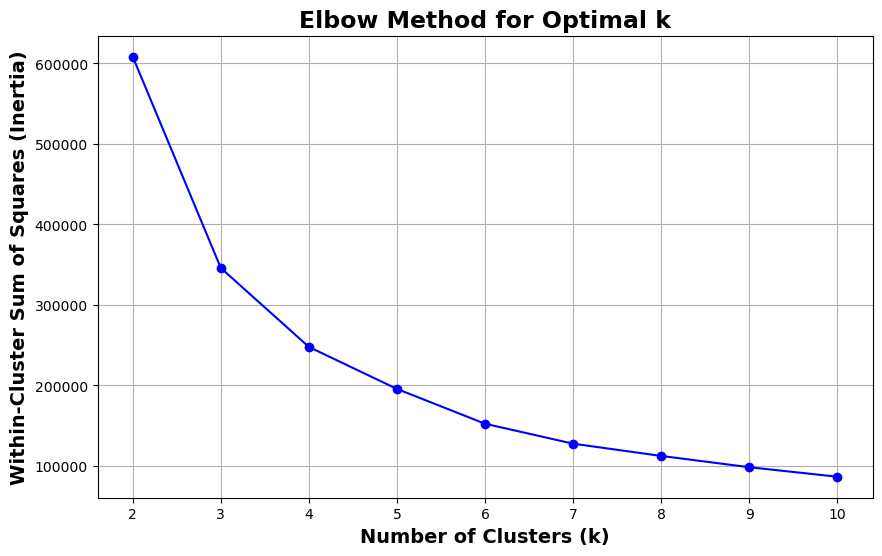

In [18]:
# Extract features for clustering (exclude the 'quality' column)
X = df.drop('quality', axis=1)

# Initialize lists to store inertia values
inertia_values = []

# Test different values of k (number of clusters)
k_values = range(2, 11)  # Test k from 2 to 10

for k in k_values:
    # Create KMeans clustering model
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)

    # Append the inertia value to the list
    inertia_values.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)', fontsize=14, fontweight='bold')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)', fontsize=14, fontweight='bold')
plt.title('Elbow Method for Optimal k', fontsize=17, fontweight='bold')
plt.xticks(k_values)
plt.grid(True)
plt.savefig('5.png', dpi=300)
plt.show()

### Model Creation and Evaluation

##### Clustering

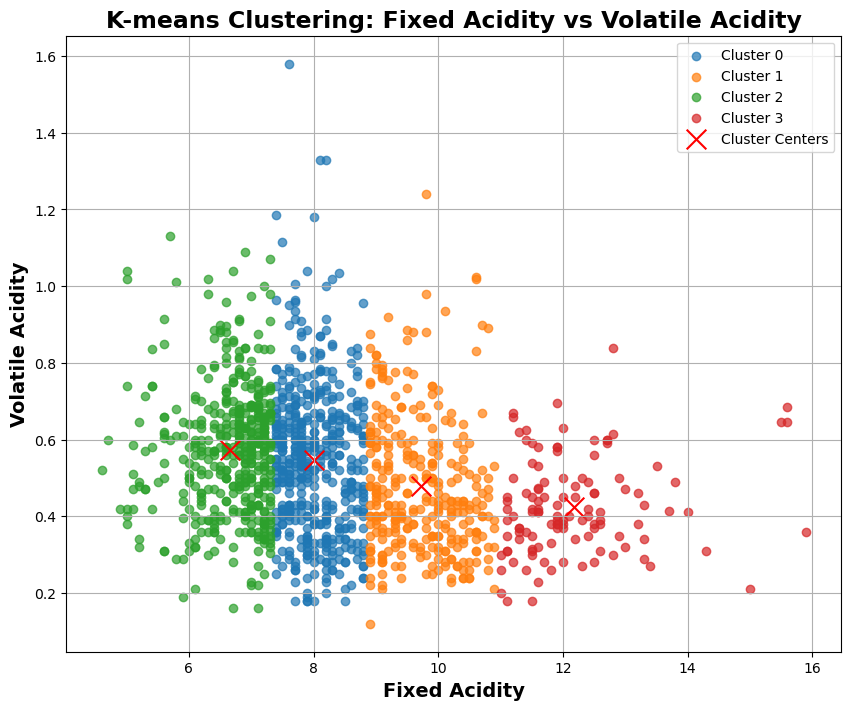

In [19]:
# Perform K-means clustering
km = KMeans(n_clusters=4, random_state=42)  # Specify the number of clusters
df['cluster'] = km.fit_predict(df[['fixed acidity', 'volatile acidity']])  # Fit K-means and assign cluster labels

# Plot clusters with cluster centers
plt.figure(figsize=(10, 8))

# Plot each cluster using a different color
for cluster_label in sorted(df['cluster'].unique()):
    cluster_data = df[df['cluster'] == cluster_label]
    plt.scatter(cluster_data['fixed acidity'], cluster_data['volatile acidity'], label=f'Cluster {cluster_label}', alpha=0.7)

# Plot cluster centers
cluster_centers = km.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', s=200, c='red', label='Cluster Centers')

# Set plot title and labels
plt.title('K-means Clustering: Fixed Acidity vs Volatile Acidity', fontsize=17, fontweight='bold')
plt.xlabel('Fixed Acidity', fontsize=14, fontweight='bold')
plt.ylabel('Volatile Acidity', fontsize=14, fontweight='bold')

# Add legend
plt.legend()
plt.grid(True)
plt.savefig('6.png', dpi=300)
plt.show()

##### Checking the code if it predicts correctly

In [20]:
# Example new data point(s) for prediction
new_data = pd.DataFrame({'fixed acidity': [7.5, 6.0], 'volatile acidity': [0.6, 0.3]})

# Use the trained K-means model to predict cluster labels for the new data
predicted_clusters = km.predict(new_data)

# Display the predicted cluster labels for the new data points
for i, cluster_label in enumerate(predicted_clusters):
    print(f"Predicted Cluster for New Data Point {i + 1}: {cluster_label}")

Predicted Cluster for New Data Point 1: 0
Predicted Cluster for New Data Point 2: 2


##### Visualizing the Predictions

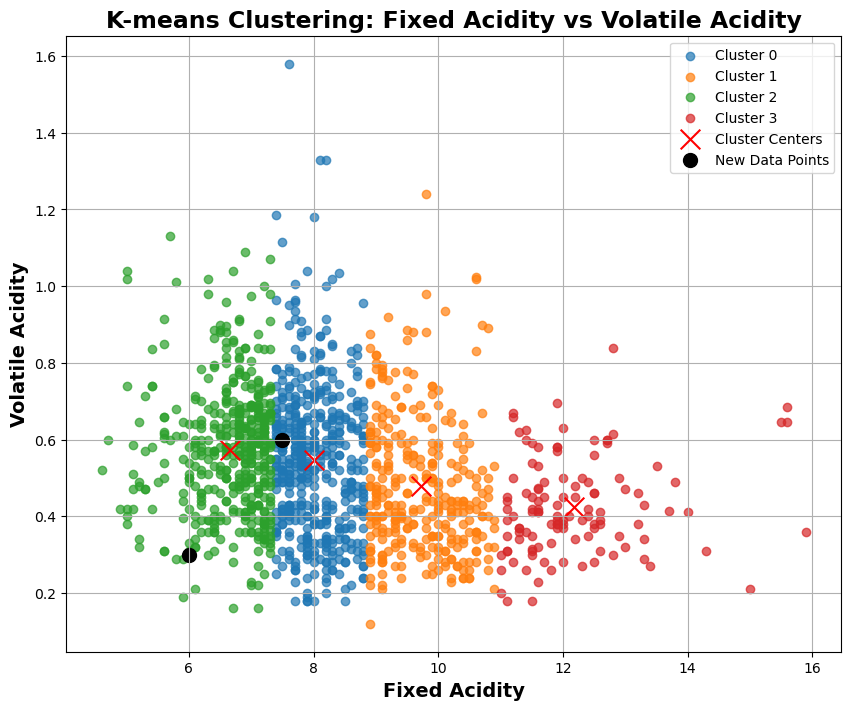

In [21]:
# Plot the new data points along with existing clusters and cluster centers
plt.figure(figsize=(10, 8))

# Plot each existing cluster using a different color
for cluster_label in sorted(df['cluster'].unique()):
    cluster_data = df[df['cluster'] == cluster_label]
    plt.scatter(cluster_data['fixed acidity'], cluster_data['volatile acidity'], label=f'Cluster {cluster_label}', alpha=0.7)

# Plot cluster centers
cluster_centers = km.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', s=200, c='red', label='Cluster Centers')

# Plot the new data points with predicted cluster labels
plt.scatter(new_data['fixed acidity'], new_data['volatile acidity'], marker='o', s=100, c='black', label='New Data Points')

# Set plot title and labels
plt.title('K-means Clustering: Fixed Acidity vs Volatile Acidity', fontsize=17, fontweight='bold')
plt.xlabel('Fixed Acidity', fontsize=14, fontweight='bold')
plt.ylabel('Volatile Acidity', fontsize=14, fontweight='bold')

# Add legend
plt.legend()
plt.grid(True)
plt.savefig('8.png', dpi=300)
plt.show()

##### Fitting

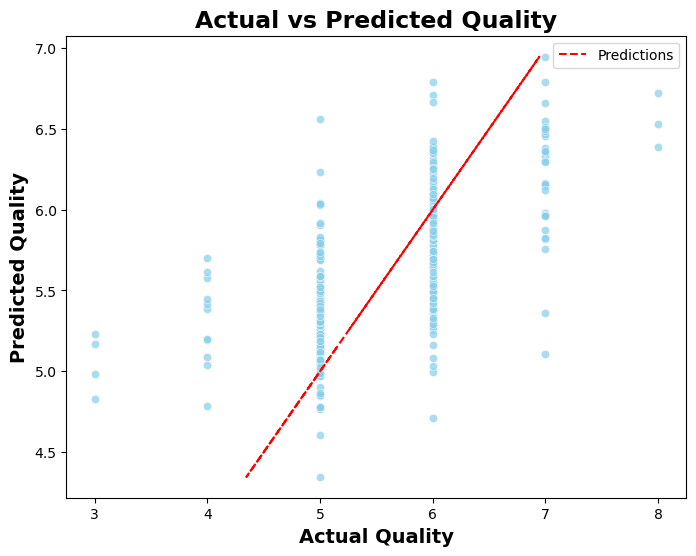

In [22]:
# Separate features (X) and target variable (y)
X = df.drop('quality', axis=1)  # Features (all columns except 'quality')
y = df['quality']  # Target variable ('quality')

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Plot the predicted vs actual values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='skyblue', alpha=0.7)
plt.plot(y_pred, y_pred, color='red', linestyle='--', label='Predictions')  # Plot the diagonal line for perfect predictions
plt.title('Actual vs Predicted Quality', fontsize=17, fontweight='bold')
plt.xlabel('Actual Quality', fontsize=14, fontweight='bold')
plt.ylabel('Predicted Quality', fontsize=14, fontweight='bold')
plt.legend()
plt.savefig('7.png', dpi=300)
plt.show()

In [23]:
#Calculating the coefficients

coefficients = model.coef_
print(f'Coefficients {coefficients}')

#Calculating the intercept

intercept = model.intercept_
print(f'Intercept: {intercept}')

#Calculating R-Squared

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R2: {r2}')

#Calculating Root Mean Squared Error

rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')

#Calculating Mean Absolute Error

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE {mae}')

# Evaluate the model (optional)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Coefficients [-2.46450695e-02 -9.99460472e-01 -9.87366888e-02 -2.97726075e-03
 -2.21283496e+00  4.83395617e-03 -3.75062276e-03  2.16875399e+01
 -7.61703398e-01  8.54433781e-01  3.06790355e-01 -1.49406604e-02]
Intercept: -16.14227344108354
R2: 0.3946693784790889
RMSE: 0.6548201993155366
MAE 0.5040503205344857
Mean Squared Error: 0.42878949343163913
